
<div style="text-align: center;">
  <img src="https://github.com/Hack-io-Data/Imagenes/blob/main/01-LogosHackio/logo_naranja@4x.png?raw=true" alt="esquema" />
</div>


# Laboratorio de Sistemas de Recomendación

## Objetivos del Laboratorio

1.	Implementar y comparar diferentes tipos de sistemas de recomendación utilizando datos reales.

2.	Explorar el impacto de las características de los datos en la calidad de las recomendaciones.

3.	Desarrollar habilidades en preprocesamiento, modelado y evaluación de sistemas de recomendación.


## Los problemas

A lo largo de este laboratorio deberás enfrentarte a distintos casos prácticos:

- **Caso 1: Sistema de Recomendación Basado en Contenido**

	Debes construir un sistema que recomiende videojuegos similares basándose en su descripción y géneros. Para eso deberás:

	- Preprocesar las descripciones de los juegos (texto) utilizando técnicas de NLP aprendidas durante la clase.

	- Extraer y limpiar las etiquetas de género para su uso en el sistema de recomendación.

	- Implementar una métrica de similitud (como el coseno) para recomendar juegos similares.

	- Evaluar las recomendaciones generadas para un conjunto de juegos específicos.

- **Caso 2: Sistema de Recomendación Basado en Popularidad**

	Debes un sistema que recomiende los juegos más populares según su calificación general y número de reseñas. Para eso deberás:
	
	- Limpiar y convertir las columnas relacionadas con las calificaciones y las reseñas en datos numéricos.
	
	- Identificar los juegos más populares utilizando métricas como la mediana de calificaciones ponderadas.
	
	- Crear una tabla de recomendaciones generales para diferentes géneros.

## Los Datos


- **1. games_description.csv**: Este archivo contiene información detallada sobre videojuegos disponibles en una tienda. Las columnas que tenemos son: 


	- **`name`**: Nombre del videojuego.

	- **`short_description`**: Breve descripción del videojuego.

	- **`long_description`**: Descripción completa y detallada del videojuego.

	- **`genres`**: Lista de géneros asociados al videojuego (por ejemplo, Acción, RPG).

	- **`minimum_system_requirement`**: Requisitos mínimos para ejecutar el videojuego.

	- **`recommend_system_requirement`**: Requisitos recomendados para ejecutar el videojuego.

	- **`release_date`**: Fecha de lanzamiento del videojuego.

	- **`developer`**: Nombre del desarrollador del videojuego.

	- **`publisher`**: Nombre del publicador del videojuego.

	- **`overall_player_rating`**: Calificación general de los jugadores (categórica).

	- **`number_of_reviews_from_purchased_people`**: Número de reseñas realizadas por personas que compraron el juego.

	- **`number_of_english_reviews`**: Número de reseñas en inglés.

	- **`link`**: Enlace al videojuego en la tienda.


- **2. games_ranking.csv**: Este archivo contiene información sobre el ranking de videojuegos basados en diferentes métricas. Las columnsa que tenemos son:


	- **`game_name`**: Nombre del videojuego.

	- **`genre`**: Género principal del videojuego.

	- **`rank_type`**: Tipo de ranking (por ejemplo, ventas, popularidad).

	- **`rank`**: Posición del videojuego en el ranking correspondiente.

----

- Los datos del archivo `games_description.csv` pueden utilizarse para construir sistemas de recomendación basados en contenido.
- Los datos del archivo `games_ranking.csv` son ideales para implementar sistemas basados en popularidad.


In [268]:
import numpy as numpy
import pandas as pd
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from scipy.spatial.distance import pdist, squareform

import seaborn as sns
import matplotlib.pyplot as plt

from src import soporte_sistemas_recomendacion as sr


# Sistemas de recomendación

### Basado en contenido

In [269]:
df = pd.read_csv('datos/games_description.csv')

In [270]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 290 entries, 0 to 289
Data columns (total 13 columns):
 #   Column                                   Non-Null Count  Dtype 
---  ------                                   --------------  ----- 
 0   name                                     290 non-null    object
 1   short_description                        277 non-null    object
 2   long_description                         290 non-null    object
 3   genres                                   290 non-null    object
 4   minimum_system_requirement               290 non-null    object
 5   recommend_system_requirement             290 non-null    object
 6   release_date                             290 non-null    object
 7   developer                                290 non-null    object
 8   publisher                                290 non-null    object
 9   overall_player_rating                    290 non-null    object
 10  number_of_reviews_from_purchased_people  290 non-null    objec

In [271]:
df.shape

(290, 13)

In [272]:
df.sample(3)

,name,short_description,long_description,genres,minimum_system_requirement,recommend_system_requirement,release_date,developer,publisher,overall_player_rating,number_of_reviews_from_purchased_people,number_of_english_reviews,link
227,iRacing,We are the world’s premier motorsports racing ...,About This Game\nWhat Is iRacing?We are the wo...,"['Racing', 'Automobile Sim', 'Simulation', 'VR...",['Requires a 64-bit processor and operating sy...,['Requires a 64-bit processor and operating sy...,"12 Jan, 2015","['iRacing.com Motorsport Simulations', 'iRacing']","['iRacing.com Motorsport Simulations', 'iRacing']",Very Positive,"(2,707)","2,606",https://store.steampowered.com/app/266410/iRac...
242,Undisputed,Become Undisputed in the most authentic boxing...,About This Game\nUndisputed is an authentic bo...,"['3D Fighter', 'Third Person', '3D', 'Combat',...",['Requires a 64-bit processor and operating sy...,['Requires a 64-bit processor and operating sy...,"31 Jan, 2023",['Steel City Interactive'],['Deep Silver'],Mostly Positive,"(13,370)","11,018",https://store.steampowered.com/app/1451190/Und...
282,GP Bikes,"GP Bikes is a realistic motorcycle simulator, ...",About This Game\n\t\t\t\t\t\t\tGP Bikes is a r...,"['Racing', 'Sports', 'Bikes', 'Simulation', 'M...",['Requires a 64-bit processor and operating sy...,['Requires a 64-bit processor and operating sy...,"17 Dec, 2021",['PiBoSo'],['PiBoSo'],Very Positive,(92% of 297) All Time,240,https://store.steampowered.com/app/848050/GP_B...


In [273]:
df.head()

,name,short_description,long_description,genres,minimum_system_requirement,recommend_system_requirement,release_date,developer,publisher,overall_player_rating,number_of_reviews_from_purchased_people,number_of_english_reviews,link
0,Black Myth: Wukong,Black Myth: Wukong is an action RPG rooted in ...,About This Game\n\t\t\t\t\t\t\tBlack Myth: Wuk...,"['Mythology', 'Action RPG', 'Action', 'RPG', '...",['Requires a 64-bit processor and operating sy...,['Requires a 64-bit processor and operating sy...,"19 Aug, 2024",['Game Science'],['Game Science'],Overwhelmingly Positive,"(654,820)","51,931",https://store.steampowered.com/app/2358720/Bla...
1,Counter-Strike 2,"For over two decades, Counter-Strike has offer...",About This Game\n\t\t\t\t\t\t\tFor over two de...,"['FPS', 'Shooter', 'Multiplayer', 'Competitive...","['OS: Windows® 10', 'Processor: 4 hardware CPU...","['OS: Windows® 10', 'Processor: 4 hardware CPU...","21 Aug, 2012",['Valve'],['Valve'],Very Positive,"(8,313,603)","2,258,990",https://store.steampowered.com/app/730/Counter...
2,"Warhammer 40,000: Space Marine 2",Embody the superhuman skill and brutality of a...,About This Game\nEmbody the superhuman skill a...,"['Warhammer 40K', 'Action', 'Third-Person Shoo...",['Requires a 64-bit processor and operating sy...,['Requires a 64-bit processor and operating sy...,"9 Sep, 2024",['Saber Interactive'],['Focus Entertainment'],Very Positive,"(81% of 62,791) All Time","51,920",https://store.steampowered.com/app/2183900/War...
3,Cyberpunk 2077,"Cyberpunk 2077 is an open-world, action-advent...",About This Game\nCyberpunk 2077 is an open-wor...,"['Cyberpunk', 'Open World', 'Nudity', 'RPG', '...",['Requires a 64-bit processor and operating sy...,['Requires a 64-bit processor and operating sy...,"10 Dec, 2020",['CD PROJEKT RED'],['CD PROJEKT RED'],Very Positive,"(680,264)","324,124",https://store.steampowered.com/app/1091500/Cyb...
4,ELDEN RING,THE CRITICALLY ACCLAIMED FANTASY ACTION RPG. R...,About This Game\nTHE CRITICALLY ACCLAIMED FANT...,"['Souls-like', 'Dark Fantasy', 'Open World', '...",['Requires a 64-bit processor and operating sy...,['Requires a 64-bit processor and operating sy...,"25 Feb, 2022","['FromSoftware, Inc.']","['FromSoftware, Inc.', 'Bandai Namco Entertain...",Very Positive,"(705,261)","491,741",https://store.steampowered.com/app/1245620/ELD...


In [274]:
df['genres'][0]

"['Mythology', 'Action RPG', 'Action', 'RPG', 'Souls-like', 'Combat', 'Story Rich', 'Singleplayer', 'Drama', 'Action-Adventure', 'Dark Fantasy', 'Atmospheric', 'Adventure', '3D', 'Fantasy', 'Hack and Slash', 'Third Person', 'Difficult', 'Music', 'Violent']"

In [275]:
# import ast

# df['genres'] = df['genres'].map(ast.literal_eval)

In [276]:
vectorize = CountVectorizer(max_features=250, stop_words='english')
vectorize

CountVectorizer(max_features=250, stop_words='english')

Invoco a mi objeto a utlizar

In [277]:
x = vectorize.fit_transform(df['genres']).toarray() #tomo para mi modelo a mi columna genres
x

array([[0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 1, 0]], dtype=int64)

In [278]:
similarity = cosine_similarity(x)
similarity

array([[1.        , 0.16439899, 0.5062176 , ..., 0.1823843 , 0.2906191 ,
        0.16979054],
       [0.16439899, 1.        , 0.38490018, ..., 0.11094004, 0.07071068,
        0.15491933],
       [0.5062176 , 0.38490018, 1.        , ..., 0.21350421, 0.27216553,
        0.2981424 ],
       ...,
       [0.1823843 , 0.11094004, 0.21350421, ..., 1.        , 0.2941742 ,
        0.50128041],
       [0.2906191 , 0.07071068, 0.27216553, ..., 0.2941742 , 1.        ,
        0.45643546],
       [0.16979054, 0.15491933, 0.2981424 , ..., 0.50128041, 0.45643546,
        1.        ]])

In [279]:
def get_index_from_name(name):
    return df[df.name == name].index[0]

def get_name_from_index(index):
    return df[df.index == index]['name'].values[0]

In [280]:
user_like_game = 'God of War' #hago la prueba con este juego

In [281]:
game_index = get_index_from_name(user_like_game) #busco el indice de mi pelicula
game_index

118

In [282]:
similarity[game_index] #busco la similitud de mi juego elegido con los demás

array([0.82425939, 0.1114172 , 0.42884501, 0.61025715, 0.58803524,
       0.15694121, 0.14037248, 0.29543947, 0.16251869, 0.23788041,
       0.57635398, 0.44585083, 0.27586207, 0.4247741 , 0.39686563,
       0.14294834, 0.32826608, 0.30323922, 0.53189789, 0.21971769,
       0.3555795 , 0.37139068, 0.48141065, 0.3555795 , 0.30512858,
       0.32325409, 0.36417852, 0.31583808, 0.44566881, 0.56498834,
       0.15488062, 0.38602432, 0.25110593, 0.36148514, 0.30016681,
       0.63692976, 0.62776482, 0.5336001 , 0.19851667, 0.30512858,
       0.10344828, 0.61056251, 0.44074128, 0.40852974, 0.20689655,
       0.19822792, 0.37665889, 0.18569534, 0.36148514, 0.07427814,
       0.32708557, 0.70564229, 0.1754656 , 0.50549588, 0.47590863,
       0.48280788, 0.27586207, 0.31034483, 0.36633751, 0.25997347,
       0.44585083, 0.33136138, 0.38790491, 0.4645821 , 0.66703735,
       0.31672303, 0.52522573, 0.41105415, 0.24759378, 0.28602803,
       0.30528126, 0.34482759, 0.20261022, 0.63692976, 0.65653

In [283]:
similar_games=list(enumerate(similarity[game_index]))

In [284]:
similar_games[:20]

[(0, 0.8242593896780956),
 (1, 0.11141720290623112),
 (2, 0.428845013935118),
 (3, 0.6102571532587293),
 (4, 0.5880352375606642),
 (5, 0.15694120514358612),
 (6, 0.14037248126871926),
 (7, 0.29543947393437575),
 (8, 0.16251869354636594),
 (9, 0.23788041338002106),
 (10, 0.5763539780776888),
 (11, 0.4458508287089374),
 (12, 0.27586206896551724),
 (13, 0.4247741038414492),
 (14, 0.39686563206723136),
 (15, 0.14294833797837264),
 (16, 0.32826608214930636),
 (17, 0.3032392174315614),
 (18, 0.5318978854080616),
 (19, 0.21971768720102053)]

In [285]:
sorted_games =sorted(similar_games, key=lambda x: x[1], reverse=True) #Lo ordenamos para que nos de las pelis que más se parecen a nuestra peli
top_game ={}
for i in sorted_games[1:21]: # le digo que me devuelva las primera 20 pelis sin contar ella misma
    top_game[get_name_from_index(i[0])]=i[1]
top_game

{'Black Myth: Wukong': 0.8242593896780956,
 'Sekiro™: Shadows Die Twice - GOTY Edition': 0.705642285072797,
 'Monster Hunter: World': 0.6670373459650701,
 'Hogwarts Legacy': 0.6627227564416557,
 'DARK SOULS™ III': 0.6591530616030618,
 'Lies of P': 0.6565321642986126,
 'ELDEN RING Shadow of the Erdtree': 0.636929755298482,
 "Dragon's Dogma 2": 0.636929755298482,
 'STAR WARS Jedi: Survivor™': 0.6336854786668167,
 'Sonic Frontiers': 0.6303750805673781,
 'Diablo® IV': 0.6277648205743445,
 'The Elder Scrolls® Online': 0.6105625108726636,
 'Visions of Mana': 0.6105625108726636,
 'Cyberpunk 2077': 0.6102571532587293,
 'Fallout: New Vegas': 0.6003336113685631,
 'FINAL FANTASY VII REMAKE INTERGRADE': 0.5946837453780289,
 'ELDEN RING': 0.5880352375606642,
 'Warhammer 40,000: Space Marine 2 - Season Pass': 0.5813183589761797,
 'Cyberpunk 2077: Phantom Liberty': 0.5763539780776888,
 'The Witcher 3: Wild Hunt': 0.5649883385169101}

C:\Users\DELL\AppData\Local\Temp\ipykernel_17228\2939803237.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


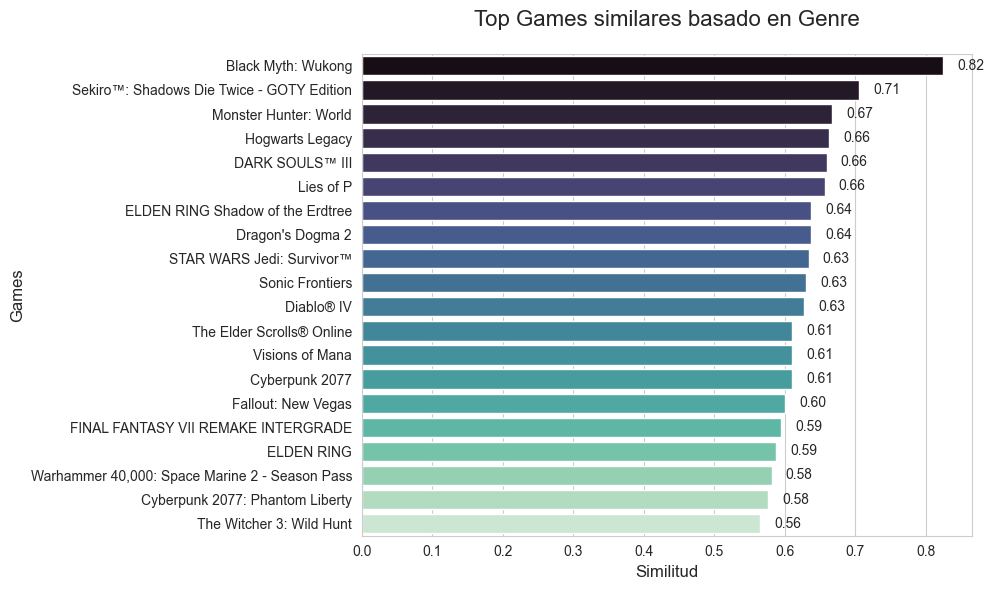

In [286]:
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")

sns.barplot(
    x=list(top_game.values()), 
    y=list(top_game.keys()), 
    palette="mako"
)

plt.title("Top Games similares basado en Genre", fontsize=16, pad=20)
plt.xlabel("Similitud", fontsize=12)
plt.ylabel("Games", fontsize=12)

# Añadir valores al final de cada barra
for i, value in enumerate(top_game.values()):
    plt.text(value + 0.02, i, f"{value:.2f}", va='center', fontsize=10)

plt.tight_layout()


Vemos que los dos primeros resaltan en similaridad, por encima de los demás (mayor a 0.70).Los demás se quedan se quedan entre 0.56 y 0.67 por lo que se asemejan mucho entre ellos con relación al juego elegido

### Basado en popularidad

In [287]:
df_rank = pd.read_csv('datos/games_ranking.csv')

In [288]:
df_rank.shape

(672, 4)

In [289]:
df_rank['rank_type'].value_counts()

rank_type
Revenue    240
Sales      220
Review     212
Name: count, dtype: int64

In [290]:
df_rank[(df_rank['rank_type'] == 'Review') & (df_rank['genre'] == 'Action')]

,game_name,genre,rank_type,rank
76,Counter-Strike 2,Action,Review,1
77,Grand Theft Auto V,Action,Review,2
78,Dota 2,Action,Review,3
79,Terraria,Action,Review,4
80,Black Myth: Wukong,Action,Review,5
81,Wallpaper Engine,Action,Review,6
82,Tom Clancy's Rainbow Six® Siege,Action,Review,7
83,Left 4 Dead 2,Action,Review,8
84,The Witcher 3: Wild Hunt,Action,Review,9
85,Team Fortress 2,Action,Review,10


In [291]:
df_rank[df_rank['game_name'] == 'Counter-Strike 2']

,game_name,genre,rank_type,rank
0,Counter-Strike 2,Action,Sales,1
38,Counter-Strike 2,Action,Revenue,3
76,Counter-Strike 2,Action,Review,1


In [292]:
df_rank.shape

(672, 4)

In [293]:
df_rank.T

,0,1,2,3,4,5,6,7,8,9,...,662,663,664,665,666,667,668,669,670,671
game_name,Counter-Strike 2,"Warhammer 40,000: Space Marine 2",Cyberpunk 2077,Black Myth: Wukong,ELDEN RING,PUBG: BATTLEGROUNDS,DRAGON BALL: Sparking! ZERO,Apex Legends™,Dota 2,Party Animals,...,Golf Gang,Lonely Mountains: Downhill,GP Bikes,Golf Peaks,PIPE by BMX Streets,MXGP PRO,MXGP 2019 - The Official Motocross Videogame,Ride 2,Tanuki Sunset,Grand Mountain Adventure: Wonderlands
genre,Action,Action,Action,Action,Action,Action,Action,Action,Action,Action,...,Sports & Racing,Sports & Racing,Sports & Racing,Sports & Racing,Sports & Racing,Sports & Racing,Sports & Racing,Sports & Racing,Sports & Racing,Sports & Racing
rank_type,Sales,Sales,Sales,Sales,Sales,Sales,Sales,Sales,Sales,Sales,...,Review,Review,Review,Review,Review,Review,Review,Review,Review,Review
rank,1,2,3,4,5,6,7,8,9,10,...,31,32,33,34,35,36,37,38,39,40


In [294]:
df_final = df_rank.merge(df, left_on='game_name', right_on='name', how='inner')
df_final.head()

,game_name,genre,rank_type,rank,name,short_description,long_description,genres,minimum_system_requirement,recommend_system_requirement,release_date,developer,publisher,overall_player_rating,number_of_reviews_from_purchased_people,number_of_english_reviews,link
0,Counter-Strike 2,Action,Sales,1,Counter-Strike 2,"For over two decades, Counter-Strike has offer...",About This Game\n\t\t\t\t\t\t\tFor over two de...,"['FPS', 'Shooter', 'Multiplayer', 'Competitive...","['OS: Windows® 10', 'Processor: 4 hardware CPU...","['OS: Windows® 10', 'Processor: 4 hardware CPU...","21 Aug, 2012",['Valve'],['Valve'],Very Positive,"(8,313,603)","2,258,990",https://store.steampowered.com/app/730/Counter...
1,"Warhammer 40,000: Space Marine 2",Action,Sales,2,"Warhammer 40,000: Space Marine 2",Embody the superhuman skill and brutality of a...,About This Game\nEmbody the superhuman skill a...,"['Warhammer 40K', 'Action', 'Third-Person Shoo...",['Requires a 64-bit processor and operating sy...,['Requires a 64-bit processor and operating sy...,"9 Sep, 2024",['Saber Interactive'],['Focus Entertainment'],Very Positive,"(81% of 62,791) All Time","51,920",https://store.steampowered.com/app/2183900/War...
2,Cyberpunk 2077,Action,Sales,3,Cyberpunk 2077,"Cyberpunk 2077 is an open-world, action-advent...",About This Game\nCyberpunk 2077 is an open-wor...,"['Cyberpunk', 'Open World', 'Nudity', 'RPG', '...",['Requires a 64-bit processor and operating sy...,['Requires a 64-bit processor and operating sy...,"10 Dec, 2020",['CD PROJEKT RED'],['CD PROJEKT RED'],Very Positive,"(680,264)","324,124",https://store.steampowered.com/app/1091500/Cyb...
3,Black Myth: Wukong,Action,Sales,4,Black Myth: Wukong,Black Myth: Wukong is an action RPG rooted in ...,About This Game\n\t\t\t\t\t\t\tBlack Myth: Wuk...,"['Mythology', 'Action RPG', 'Action', 'RPG', '...",['Requires a 64-bit processor and operating sy...,['Requires a 64-bit processor and operating sy...,"19 Aug, 2024",['Game Science'],['Game Science'],Overwhelmingly Positive,"(654,820)","51,931",https://store.steampowered.com/app/2358720/Bla...
4,ELDEN RING,Action,Sales,5,ELDEN RING,THE CRITICALLY ACCLAIMED FANTASY ACTION RPG. R...,About This Game\nTHE CRITICALLY ACCLAIMED FANT...,"['Souls-like', 'Dark Fantasy', 'Open World', '...",['Requires a 64-bit processor and operating sy...,['Requires a 64-bit processor and operating sy...,"25 Feb, 2022","['FromSoftware, Inc.']","['FromSoftware, Inc.', 'Bandai Namco Entertain...",Very Positive,"(705,261)","491,741",https://store.steampowered.com/app/1245620/ELD...


In [295]:
df_final.duplicated().sum()

0

In [296]:
df_final.shape

(656, 17)

In [297]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 656 entries, 0 to 655
Data columns (total 17 columns):
 #   Column                                   Non-Null Count  Dtype 
---  ------                                   --------------  ----- 
 0   game_name                                656 non-null    object
 1   genre                                    656 non-null    object
 2   rank_type                                656 non-null    object
 3   rank                                     656 non-null    int64 
 4   name                                     656 non-null    object
 5   short_description                        634 non-null    object
 6   long_description                         656 non-null    object
 7   genres                                   656 non-null    object
 8   minimum_system_requirement               656 non-null    object
 9   recommend_system_requirement             656 non-null    object
 10  release_date                             656 non-null    objec

In [298]:
df_final['overall_player_rating'].value_counts()

overall_player_rating
Very Positive              344
Overwhelmingly Positive    171
Mixed                       70
Mostly Positive             60
Mostly Negative              4
Very Negative                2
7 user reviews               1
Positive                     1
6 user reviews               1
1 user reviews               1
4 user reviews               1
Name: count, dtype: int64

In [299]:
steam_ratings = {
    "Overwhelmingly Positive": 10,
    "Very Positive": 9,
    "Positive": 8,
    "Mostly Positive": 7,
    "Mixed": 6,
    "Mostly Negative": 5,
    "Negative": 4,
    "Very Negative": 3,
    "Extremely Negative": 2,
    "Overwhelmingly Negative": 1
}

In [300]:
df_final['overall_player_rating'] = df_final['overall_player_rating'].map(steam_ratings).fillna(6).astype(int)

In [301]:
df_final['overall_player_rating'].value_counts()

overall_player_rating
9     344
10    171
6      74
7      60
5       4
3       2
8       1
Name: count, dtype: int64

In [302]:
df_final['number_of_reviews_from_purchased_people'].nunique()

287

In [303]:
df_final['genre'].value_counts()

genre
Simulation         119
Strategy           115
Sports & Racing    115
Action             112
Role-Playing       103
Adventure           92
Name: count, dtype: int64

In [304]:
df_final_filtro = df_final[['name', 'genre', 'overall_player_rating', 'number_of_english_reviews']]

In [305]:
df_final_filtro.head()

,name,genre,overall_player_rating,number_of_english_reviews
0,Counter-Strike 2,Action,9,"2,258,990"
1,"Warhammer 40,000: Space Marine 2",Action,9,"51,920"
2,Cyberpunk 2077,Action,9,"324,124"
3,Black Myth: Wukong,Action,10,"51,931"
4,ELDEN RING,Action,9,"491,741"


In [306]:
df_final_filtro.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 656 entries, 0 to 655
Data columns (total 4 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   name                       656 non-null    object
 1   genre                      656 non-null    object
 2   overall_player_rating      656 non-null    int32 
 3   number_of_english_reviews  656 non-null    object
dtypes: int32(1), object(3)
memory usage: 18.1+ KB


In [308]:
df_final_filtro['number_of_english_reviews'] = df_final_filtro['number_of_english_reviews'].str.replace(',','')
df_final_filtro['number_of_english_reviews'] = df_final_filtro['number_of_english_reviews'].astype(int)

C:\Users\DELL\AppData\Local\Temp\ipykernel_17228\3474297930.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final_filtro['number_of_english_reviews'] = df_final_filtro['number_of_english_reviews'].str.replace(',','')
C:\Users\DELL\AppData\Local\Temp\ipykernel_17228\3474297930.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final_filtro['number_of_english_reviews'] = df_final_filtro['number_of_english_reviews'].astype(int)


In [309]:
df_recomendador = df_final_filtro.groupby(['name', 'genre'])[['overall_player_rating', 'number_of_english_reviews']].median().reset_index()

In [312]:
df_recomendador.shape

(392, 4)

In [313]:
df_recomendador.duplicated().sum()

0

In [311]:
df_recomendador[df_recomendador["genre"]=="Action"]

,name,genre,overall_player_rating,number_of_english_reviews
3,ARK: Survival Evolved,Action,9.0,310038.0
17,Among Us,Action,9.0,406705.0
20,Apex Legends™,Action,6.0,406269.0
32,Battlefield™ V,Action,7.0,34879.0
34,Black Desert,Action,7.0,46936.0
...,...,...,...,...
365,Valheim,Action,9.0,271721.0
366,Vampire Survivors,Action,10.0,120230.0
371,Wallpaper Engine,Action,10.0,210537.0
373,Warframe,Action,9.0,253397.0
